In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

combinedFlights2018 = "archive\Combined_Flights_2018.csv"

data = pd.read_csv(combinedFlights2018, delimiter=',');

print(data.head());

   FlightDate            Airline Origin Dest  Cancelled  Diverted  CRSDepTime  \
0  2018-01-23  Endeavor Air Inc.    ABY  ATL      False     False        1202   
1  2018-01-24  Endeavor Air Inc.    ABY  ATL      False     False        1202   
2  2018-01-25  Endeavor Air Inc.    ABY  ATL      False     False        1202   
3  2018-01-26  Endeavor Air Inc.    ABY  ATL      False     False        1202   
4  2018-01-27  Endeavor Air Inc.    ABY  ATL      False     False        1400   

   DepTime  DepDelayMinutes  DepDelay  ...  WheelsOff  WheelsOn  TaxiIn  \
0   1157.0              0.0      -5.0  ...     1211.0    1249.0     7.0   
1   1157.0              0.0      -5.0  ...     1210.0    1246.0    12.0   
2   1153.0              0.0      -9.0  ...     1211.0    1251.0    11.0   
3   1150.0              0.0     -12.0  ...     1207.0    1242.0    11.0   
4   1355.0              0.0      -5.0  ...     1412.0    1448.0    11.0   

   CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups  ArrTime

In [2]:
interestedFeatures = data;
featureList = list(data);
#for now, only checks Distance, Year, Quarter, Month, DayOfMonth, DayOfWeek
for i in range(0,np.array(data)[0].size):
    if(i == 11 or i == 15 or i == 16 or i == 17 or i == 18 or i == 19 or i == 20):
        continue;
    else:
        interestedFeatures = interestedFeatures.drop(featureList[i], axis=1);

print(interestedFeatures.head());

   ArrDelayMinutes  Distance  Year  Quarter  Month  DayofMonth  DayOfWeek
0              0.0     145.0  2018        1      1          23          2
1              0.0     145.0  2018        1      1          24          3
2              0.0     145.0  2018        1      1          25          4
3              0.0     145.0  2018        1      1          26          5
4              0.0     145.0  2018        1      1          27          6


In [3]:
#interestingly, it seems none of these features have missing values in 2018
#however, need to drop na values from ArrDelayMinutes here
#print(np.array(interestedFeatures).size);
interestedFeatures = interestedFeatures.dropna();
#print(np.array(interestedFeatures).size);
#properly seperate target from features now that NAN values have been removed
targetArray = np.array(interestedFeatures["ArrDelayMinutes"]);
interestedFeatures = interestedFeatures.drop(["ArrDelayMinutes"], axis=1);

#time to calculate basic statistical features
intFeaturesArray = np.array(interestedFeatures);

#first lets look at the mean:
print("Means:");
print(np.mean(intFeaturesArray, axis=0));

#median:
print("Medians:");
print(np.median(intFeaturesArray, axis=0));

#max:
print("Maximums:");
print(np.max(intFeaturesArray, axis=0));

#min:
print("Minimums:");
print(np.min(intFeaturesArray, axis=0));

#next Lets look at the standard deviation:
print("Standard deviations:");
print(np.std(intFeaturesArray, axis=0));


#now for the the correlation coefficients:
print("Correlation coefficient matrix:");
print(np.corrcoef(intFeaturesArray, rowvar=False));

Means:
[ 790.03484344 2018.            2.7698719     7.30454126   15.8013915
    3.94576433]
Medians:
[ 628. 2018.    3.    8.   16.    4.]
Maximums:
[4.983e+03 2.018e+03 4.000e+00 1.200e+01 3.100e+01 7.000e+00]
Minimums:
[1.600e+01 2.018e+03 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
Standard deviations:
[595.29320687   0.           1.1146911    3.49974617   8.78556816
   2.00241784]
Correlation coefficient matrix:
[[ 1.                 nan -0.0315631  -0.02990422  0.00225223  0.01354035]
 [        nan         nan         nan         nan         nan         nan]
 [-0.0315631          nan  1.          0.97152099  0.00327627  0.00604314]
 [-0.02990422         nan  0.97152099  1.          0.00367065  0.01794141]
 [ 0.00225223         nan  0.00327627  0.00367065  1.          0.00916383]
 [ 0.01354035         nan  0.00604314  0.01794141  0.00916383  1.        ]]


C:\Users\jakee\anaconda3\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\jakee\anaconda3\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [4]:
#graph variables against each other
#NOTE: mostly irrelevant because many features are independant of each other here
#stringArray = featureList[15:21]
#iterator = 0;
#for i in range(intFeaturesArray[0].size):
#    for j in range(i):
#        iterator = iterator + 1;
#        currentFigure = plt.figure(iterator);
#        plt.scatter(np.ravel(intFeaturesArray[:,i]),np.ravel(intFeaturesArray[:,j]));
#        plt.xlabel(stringArray[i]);
#        plt.ylabel(stringArray[j]);
        
#plt.plot(np.ravel(intFeaturesArray[:,3]),np.ravel(intFeaturesArray[:,4]));

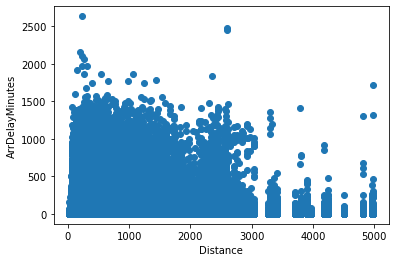

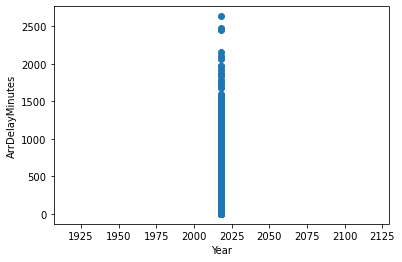

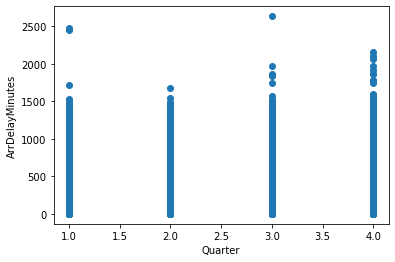

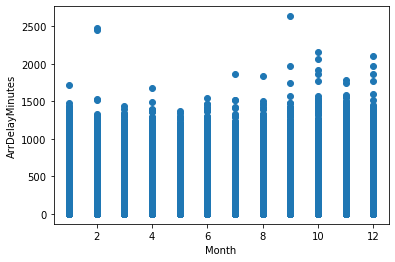

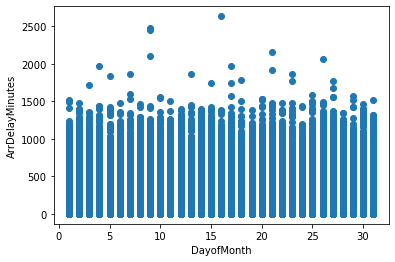

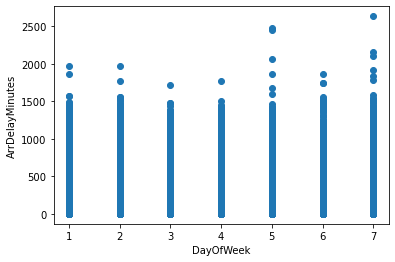

In [5]:
#create scatterplots for the features vs. target
stringArray = featureList[15:21]
iterator = 0;
for i in range(intFeaturesArray[0].size):
    iterator = iterator + 1;
    currentFigure = plt.figure(iterator);
    plt.scatter(np.ravel(intFeaturesArray[:,i]),np.ravel(targetArray));
    plt.xlabel(stringArray[i]);
    plt.ylabel("ArrDelayMinutes");

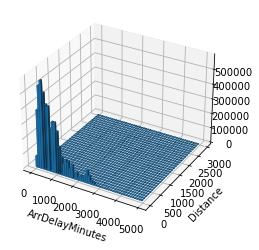

In [15]:
#Attempt to make a 3D histogram from the scatterplot data for Feature Vs. Target:
#This code is heavily based on the example provided by matplotlib, which can be
#found here: https://matplotlib.org/stable/gallery/mplot3d/hist3d.html
targetY = np.ravel(targetArray);
featureX = np.ravel(intFeaturesArray[:,0]);

fig = plt.figure();
ax = fig.add_subplot(projection='3d');

hist, xedges, yedges = np.histogram2d(featureX, targetY, bins=[50,30], range=[[0, 5000], [0, 3000]]);

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij");
xpos = xpos.ravel();
ypos = ypos.ravel();
zpos = 0;

dx = dy = 75 * np.ones_like(zpos);
dz = hist.ravel();
#print(targetY);
#print(featureX);
#print(hist);
#print(xedges);
#print(yedges);
#print(xpos);
#print(ypos);
#print(dx);
#print(dz);

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average');
plt.xlabel("ArrDelayMinutes");
plt.ylabel("Distance");